# 1. Background
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days. The dataset has two classes, the positive class represents fraudulent transactions. It contains only numeric input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues. Features $V_{1}, V_{2},\ldots, V_{28}$ are the principal components obtained with PCA, the only features which have not been transformed with PCA are "Time" and "Amount". Feature "Time" contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature "Amount" is the transaction amount. Feature $\textit{class}$ is the $\textbf{response variable}$ and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

# 2. Exploratory Data Analysis
Load your data and perform simple exploratory data analysis (EDA).The data is located in the Files section of the canvas course page. 

It is called hw2_credit_card_fraud.zip. It is a standard csv file. Answer the following:

## 2.1. What do you notice about the dataset?

In [2]:
credit = pd.read_csv("C:\\Users\\tianj\\Desktop\\" + \
                     "MATH 5430 Machine Learning for Finance\\" + \
                     "MATH 5430 - HW2\\creditcard.csv", index_col = "Time")

First of all, we can see that there is no missing value in this dataset.

In [3]:
credit.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can also gather basic statistics of the dataset, such as mean, standard deviation, quantiles and etc.

In [4]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the information table above, for features $V_{1}, V_{2}, \ldots, V_{28}$, we can observe that their magnitudes vary from $10^{-15}$ to $10^{-16}$, the distributions are concentrated around 0, and their means are also close to 0 . We can draw histograms to verify the assumption.

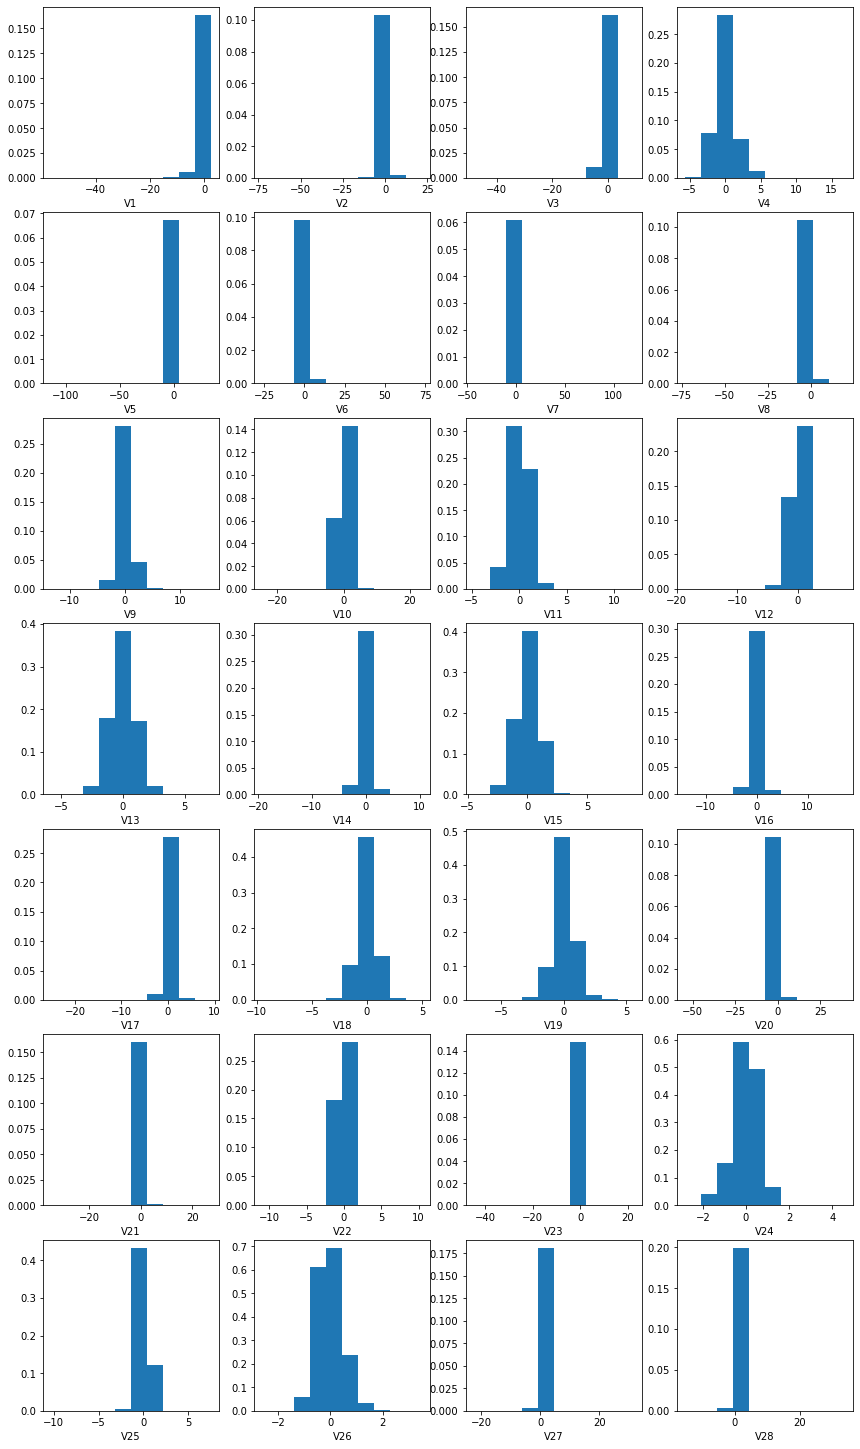

In [5]:
fig, axs = plt.subplots(7, 4)
plt.subplots_adjust(right = 2, top = 5)

which_col = 0
for row in range(7):
    for col in range(4):
        axs[row, col].hist(credit.iloc[:, which_col], density = True)
        axs[row, col].set(xlabel = credit.iloc[:, which_col].name)
        which_col += 1
plt.show()

The above histogram matrix shows very strong evidence in support of our assumption, and therefore, we can believe that these factors are factorized (i.e.they are mapped to have similar scales), and there may even be bell-shaped distributions.

In [6]:
print(f"The number of people who didn't fraud is: " + str(credit[credit["Class"] == 0].shape[0]))
print(f"The number of people who frauded is: " + str(credit[credit["Class"] == 1].shape[0]))

The number of people who didn't fraud is: 284315
The number of people who frauded is: 492


The above computations shows a huge difference between the exact numbers of fraudulent records and honest records. Hence, I am presenting this difference graphically as two bar plots as below. 

I used the true number in the first barplot, as you can see, nothing displayed for class 1 other than void.

Then I took logarithmic values for both classes in the second barplot on the left. Although it looks better now, we have to admit the existence of a significant discrepancy between the sizes of class 0 and class 1. Hence, it shows very strong evidence of data inbalance in this dataset.

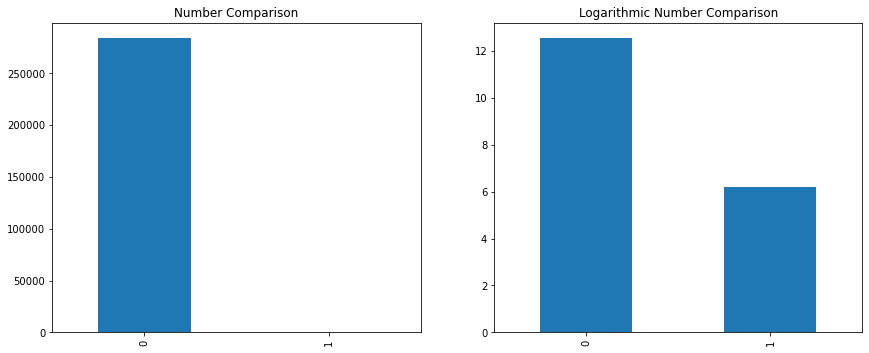

In [7]:
fig, axs = plt.subplots(1, 2)

plt.subplots_adjust(right = 2, top = 1.2)
pd.Series([credit[credit["Class"] == 0].shape[0], 
           credit[credit["Class"] == 1].shape[0]]).plot.bar(ax=axs[0])
axs[0].set(title = "Number Comparison")
pd.Series([math.log(credit[credit["Class"] == 0].shape[0]), 
           math.log(credit[credit["Class"] == 1].shape[0])]).plot.bar(ax=axs[1])
axs[1].set(title = "Logarithmic Number Comparison")
plt.show()

In [8]:
CovMat = pd.DataFrame(np.cov([credit[colname] for colname in credit.columns]), index = credit.columns)
CovMat.columns = credit.columns
CovMat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,3.836489e+00,1.935454e-16,-2.145055e-15,-7.299171e-16,3.752756e-16,7.798616e-16,-7.473558e-16,1.462770e-16,3.009602e-16,4.055191e-17,...,-1.617697e-16,3.552126e-16,2.052484e-16,-7.059339e-17,4.664801e-16,-1.475008e-16,7.428721e-17,2.280463e-16,-111.556566,-0.008244
V2,1.935454e-16,2.726820e+00,7.005845e-17,-2.203434e-16,3.654927e-18,6.418700e-16,-2.698409e-16,-2.211418e-16,-2.091666e-16,-3.065648e-16,...,1.724427e-16,2.067716e-16,2.422980e-16,-1.834199e-16,3.954556e-16,1.742390e-16,-2.845105e-16,-2.278270e-16,-219.485433,0.006260
V3,-2.145055e-15,7.005845e-17,2.299029e+00,-7.258119e-16,-1.398964e-16,3.018216e-15,2.773184e-16,1.468442e-17,3.831335e-16,3.068817e-16,...,-1.636824e-16,-9.407293e-16,-5.763254e-17,-1.138296e-16,5.949333e-17,-4.690944e-16,3.019253e-16,3.588894e-16,-79.975549,-0.012150
V4,-7.299171e-16,-2.203434e-16,-7.258119e-16,2.004684e+00,-3.624699e-15,-7.682611e-16,-1.724427e-16,1.022681e-15,9.234865e-16,-1.676526e-16,...,-6.386766e-17,3.562618e-16,2.418988e-16,1.307291e-16,3.159454e-16,-2.219401e-16,6.177201e-17,7.185112e-18,34.964556,0.007846
V5,3.752756e-16,3.654927e-18,-1.398964e-16,-3.624699e-15,1.905081e+00,1.123123e-15,2.523626e-16,1.009231e-15,1.477251e-15,5.387815e-16,...,-5.890974e-17,-1.925545e-17,8.631363e-17,-8.093952e-16,-1.132384e-17,1.440735e-17,2.463351e-16,-1.572082e-16,-133.380790,-0.005444
V6,7.798616e-16,6.418700e-16,3.018216e-15,-7.682611e-16,1.123123e-15,1.774946e+00,-6.386766e-18,-1.037450e-15,2.006343e-16,2.283269e-16,...,1.149618e-16,3.772184e-17,-1.177560e-17,-8.791783e-16,3.065648e-16,-1.658563e-16,-6.306932e-17,1.788295e-16,71.970931,-0.002415
V7,-7.473558e-16,-2.698409e-16,2.773184e-16,-1.724427e-16,2.523626e-16,-6.386766e-18,1.530401e+00,2.287066e-16,1.641135e-16,1.419296e-15,...,-1.261815e-16,-4.515222e-16,-5.772921e-17,-5.892746e-18,1.422798e-16,-3.565542e-16,-3.164585e-17,-3.236001e-17,122.936845,-0.009620
V8,1.462770e-16,-2.211418e-16,1.468442e-17,1.022681e-15,1.009231e-15,-1.037450e-15,2.287066e-16,1.426479e+00,6.088927e-16,2.490839e-16,...,1.285337e-16,-2.953879e-17,3.303156e-16,-1.792286e-16,-8.073272e-17,-6.177201e-17,2.478864e-16,-1.694489e-16,-30.792991,0.000986
V9,3.009602e-16,-2.091666e-16,3.831335e-16,9.234865e-16,1.477251e-15,2.006343e-16,1.641135e-16,6.088927e-16,1.206992e+00,-5.661416e-16,...,2.408094e-16,-2.277112e-16,-9.441570e-18,-2.018794e-16,9.272808e-17,1.410398e-17,-1.439388e-16,3.897117e-16,-12.158248,-0.004459
V10,4.055191e-17,-3.065648e-16,3.068817e-16,-1.676526e-16,5.387815e-16,2.283269e-16,1.419296e-15,2.490839e-16,-5.661416e-16,1.185594e+00,...,8.163086e-16,-2.510798e-16,1.574737e-16,-8.296559e-17,-1.560766e-16,-1.885219e-16,-1.460973e-16,1.001924e-16,-27.643420,-0.009807


In [9]:
StdMat = pd.DataFrame(np.dot(pd.DataFrame(map(np.std, [credit[colname] for colname in credit.columns])), 
                             pd.DataFrame(map(np.std, [credit[colname] for colname in credit.columns])).T), 
                      index = credit.columns)
StdMat.columns = credit.columns
StdMat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,3.836476,3.234400,2.969872,2.773246,2.703474,2.609505,2.423082,2.339366,2.151879,2.132718,...,1.438704,1.421424,1.223123,1.186274,1.021022,0.944533,0.790590,0.646530,489.907488,0.081339
V2,3.234400,2.726810,2.503796,2.338028,2.279205,2.199983,2.042816,1.972238,1.814174,1.798021,...,1.212922,1.198353,1.031173,1.000107,0.860788,0.796303,0.666519,0.545067,413.024032,0.068574
V3,2.969872,2.503796,2.299021,2.146810,2.092799,2.020056,1.875743,1.810937,1.665801,1.650968,...,1.113722,1.100345,0.946838,0.918312,0.790388,0.731177,0.612008,0.500489,379.244536,0.062966
V4,2.773246,2.338028,2.146810,2.004677,1.954241,1.886314,1.751556,1.691041,1.555513,1.541663,...,1.039986,1.027494,0.884151,0.857514,0.738059,0.682768,0.571489,0.467353,354.135959,0.058797
V5,2.703474,2.279205,2.092799,1.954241,1.905074,1.838856,1.707488,1.648496,1.516378,1.502876,...,1.013821,1.001644,0.861906,0.835939,0.719490,0.665590,0.557110,0.455595,345.226252,0.057318
V6,2.609505,2.199983,2.020056,1.886314,1.838856,1.774940,1.648138,1.591196,1.463671,1.450638,...,0.978582,0.966828,0.831947,0.806883,0.694481,0.642455,0.537746,0.439759,333.226620,0.055325
V7,2.423082,2.042816,1.875743,1.751556,1.707488,1.648138,1.530395,1.477521,1.359106,1.347004,...,0.908672,0.897758,0.772513,0.749239,0.644867,0.596558,0.499329,0.408342,309.420899,0.051373
V8,2.339366,1.972238,1.810937,1.691041,1.648496,1.591196,1.477521,1.426474,1.312150,1.300466,...,0.877278,0.866741,0.745823,0.723354,0.622588,0.575947,0.482078,0.394235,298.730630,0.049598
V9,2.151879,1.814174,1.665801,1.555513,1.516378,1.463671,1.359106,1.312150,1.206988,1.196241,...,0.806969,0.797276,0.686050,0.665381,0.572691,0.529788,0.443442,0.362639,274.789013,0.045623
V10,2.132718,1.798021,1.650968,1.541663,1.502876,1.450638,1.347004,1.300466,1.196241,1.185590,...,0.799783,0.790177,0.679941,0.659456,0.567592,0.525071,0.439494,0.359410,272.342266,0.045217


In [10]:
CorrMat = CovMat / StdMat
CorrMat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000004e+00,5.983965e-17,-7.222720e-16,-2.631995e-16,1.388123e-16,2.988543e-16,-3.084319e-16,6.252848e-17,1.398593e-16,1.901419e-17,...,-1.124413e-16,2.498992e-16,1.678067e-16,-5.950849e-17,4.568759e-16,-1.561627e-16,9.396420e-17,3.527232e-16,-0.227709,-0.101348
V2,5.983965e-17,1.000004e+00,2.798089e-17,-9.424330e-17,1.603597e-18,2.917614e-16,-1.320926e-16,-1.121273e-16,-1.152958e-16,-1.705013e-16,...,1.421714e-16,1.725465e-16,2.349731e-16,-1.834004e-16,4.594112e-16,2.188099e-16,-4.268600e-16,-4.179794e-16,-0.531411,0.091289
V3,-7.222720e-16,2.798089e-17,1.000004e+00,-3.380885e-16,-6.684655e-17,1.494125e-15,1.478446e-16,8.108739e-18,2.299996e-16,1.858799e-16,...,-1.469689e-16,-8.549405e-16,-6.086844e-17,-1.239552e-16,7.527107e-17,-6.415611e-16,4.933358e-16,7.170781e-16,-0.210881,-0.192962
V4,-2.631995e-16,-9.424330e-17,-3.380885e-16,1.000004e+00,-1.854786e-15,-4.072816e-16,-9.845116e-17,6.047642e-16,5.936861e-16,-1.087479e-16,...,-6.141205e-17,3.467287e-16,2.735945e-16,1.524514e-16,4.280762e-16,-3.250595e-16,1.080897e-16,1.537406e-17,0.098732,0.133448
V5,1.388123e-16,1.603597e-18,-6.684655e-17,-1.854786e-15,1.000004e+00,6.107728e-16,1.477976e-16,6.122134e-16,9.741969e-16,3.585003e-16,...,-5.810666e-17,-1.922385e-17,1.001427e-16,-9.682463e-16,-1.573871e-17,2.164598e-17,4.421657e-16,-3.450614e-16,-0.386358,-0.094975
V6,2.988543e-16,2.917614e-16,1.494125e-15,-4.072816e-16,6.107728e-16,1.000004e+00,-3.875140e-18,-6.519940e-16,1.370761e-16,1.573976e-16,...,1.174780e-16,3.901609e-17,-1.415426e-17,-1.089598e-15,4.414299e-16,-2.581603e-16,-1.172846e-16,4.066535e-16,0.215982,-0.043643
V7,-3.084319e-16,-1.320926e-16,1.478446e-16,-9.845116e-17,1.477976e-16,-3.875140e-18,1.000004e+00,1.547907e-16,1.207510e-16,1.053668e-15,...,-1.388637e-16,-5.029445e-16,-7.472910e-17,-7.864970e-18,2.206342e-16,-5.976858e-16,-6.337670e-17,-7.924724e-17,0.397313,-0.187257
V8,6.252848e-17,-1.121273e-16,8.108739e-18,6.047642e-16,6.122134e-16,-6.519940e-16,1.547907e-16,1.000004e+00,4.640420e-16,1.915343e-16,...,1.465142e-16,-3.408031e-17,4.428871e-16,-2.477745e-16,-1.296728e-16,-1.072529e-16,5.142039e-16,-4.298175e-16,-0.103079,0.019875
V9,1.398593e-16,-1.152958e-16,2.299996e-16,5.936861e-16,9.741969e-16,1.370761e-16,1.207510e-16,4.640420e-16,1.000004e+00,-4.732671e-16,...,2.984123e-16,-2.856114e-16,-1.376222e-17,-3.034043e-16,1.619165e-16,2.662192e-17,-3.245943e-16,1.074655e-15,-0.044246,-0.097733
V10,1.901419e-17,-1.705013e-16,1.858799e-16,-1.087479e-16,3.585003e-16,1.573976e-16,1.053668e-15,1.915343e-16,-4.732671e-16,1.000004e+00,...,1.020662e-15,-3.177512e-16,2.315991e-16,-1.258091e-16,-2.749805e-16,-3.590408e-16,-3.324219e-16,2.787692e-16,-0.101502,-0.216884


In the above several steps, I derive the matrix of covariance $\left( \mbox{i.e. CovMat} = (Cov(V_{i}, V_{j}))_{i,j \in  \left\{ 1,\ldots, 30\right\} }\right)$, and the matrix of pair-wise multiplications of standard deviations $\left(\mbox{i.e. StdMat} = \left(\sigma(V_{i})\cdot\sigma(V_{j})\right)_{i,j \in  \left\{ 1,\ldots, 30\right\} }\right)$. Here, I just simply denote the columns of $\textbf{Amount}$ and $\textbf{Class}$ as $V_{29}$ and $V_{30}$ respectively in convenience.

Since we know that:
$$
\mbox{Corr}\left( X, Y \right) = \frac{\mbox{Cov}\left( X, Y \right)}{\sigma_{X} \cdot \sigma_{Y}}
$$

Therefore we can derive the matrix of correlations $\left( \mbox{i.e. }\textbf{CorrMat} \right)$ through simply dividing $\textbf{CovMat}$ by $\textbf{StdMat}$ element-wisely.

The output of $\textbf{CorrMat}$ shows that PCA was implemented successfully. At least for the $V_{1}, V_{2}, \ldots, V_{28}$, it seems that there are no two columns who are linear dependent on each other within our dataset, or we have confidence to say that there exists almost no collinearity between any two of our features.

## 2.2. What is the problem with what you observed and how can that affect the training of a ML model?

First of all, as I stated above, there is huge discrepancy between the numbers of two classes, and for class 0 (honest records) we only have 492 rows of data, hence the dataset doesn't contain enough examples for label 0. Hence, the trained model may loss accuracy and have relatively worse performance in predicting class 0.

Besides, since previous operations with PCA only dealt with $V_{1}, V_{2}, \ldots, V_{28}$ which excluding the variable "Amount" and "Class". From the Correlation table generated above, we can also oberve some pairs of variables that exists a relatively high correlation (absolute value) between them. For instance, the correlation between $V_{2}$ and $\textbf{Amount}$ is around $\textbf{-0.531411}$, which is significantly higher than the correlations among those principle components generated by PCA.

In [11]:
def excludeSelfCorr(x):
    return x if int(round(x, 2)) != 1 else None


descCorr = list(map(lambda x: excludeSelfCorr(x),
                    sorted(np.abs([i for lst in CorrMat.values for i in lst]), reverse=True)))

for i in range(len(descCorr)-1, -1, -1):
    if descCorr[i] is None:
        descCorr.pop(i)
    else:
        continue

descCorr.sort(reverse=True)
descCorr[:10]

[0.5314108051908335,
 0.5314108051908335,
 0.39731267320589464,
 0.39731267320589464,
 0.38635761272240715,
 0.38635761272240715,
 0.3394045962464592,
 0.3394045962464592,
 0.3264822135706092,
 0.3264822135706092]

## 2.3. What is the difference and trade off of oversampling vs undersampling?

Oversampling and undersampling are both methods in adjusting unbalanced distributions of classes in a dataset. They can be almost regarded as one same method towards two opposite directions, but they also have some tiny differences. Oversampling is a method to adjust the class with deficient data up to a desired sample size, and undersampling is exactly the opposite, which is to adjust the class with abundant data down to a desired sample size. For instance, in a survey with respect to class A and class B, suppose we get much more data of class A than class B. For oversampling, we can simply choose the data from class B randomly and repeatedly, until the sample size of B is reached our desired level ($\textbf{Perfect Balance}$, that each class has exactly $\frac{N}{n}$ data in total sample, where $N$ is the total sample size, and $n$ is the number of distinct classes). Similarly, for undersampling, we can simply select the data from class A randomly and repeatedly as well, until we get a sample whose size is equal to the size of class B. From these two method, we can both accomplish our goal to balance the distributions of classes in the original dataset. 

Notice that there are other tiny differences between oversampling and undersampling. Continued with the above example, since the amount of data from class A is much larger than the amount of data from class B, one can be easily deduced is that we must select some repeated data of B from the original dataset by oversampling method, and we must  dropped some data of A from the original dataset by undersampling method. Otherwise our desired balance would not be reached.

We have to make some trade-offs between oversampling and undersampling, because none of them is a perfect strategy, and relying on either of them indiscriminatively may result in terrible outcomes. As stated above, applying the oversampling method means that we have to pick up some repeated data of B from the original dataset, and this is just purely equivalent to replicating some of raws for multiple times. Hence, if there are some significant unexpected errors such as outliers and noises among these raws, the process of oversampling would hence enlarge these errors. By constrast, applying the undersamplng method means that we have to give up many valuable data of A in our original dataset, and also reduce the confidence of our conclusion as well as the accuracy and predicting ability of our model.

## 2.4. Plot the distributions for Amount, Transaction Time, and one of the other variables. What do you see and does it make sense? Plot two of the $V_{x}$ variables together one on the x axis and the other on the y axis, what do you see?

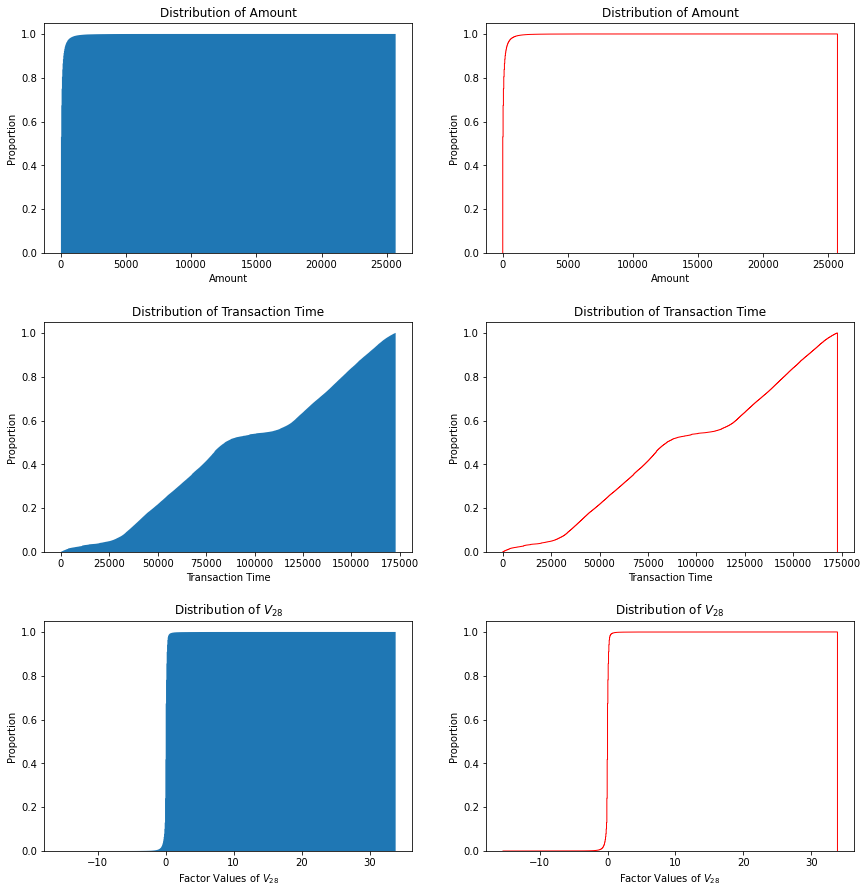

In [12]:
# Plot the distributions for Amount, Transaction Time and $V_{28}$.
fig, axs = plt.subplots(3, 2)
plt.subplots_adjust(right=2, top=3, hspace=0.3)

axs[0, 0].hist(credit["Amount"].values, density=True, bins=1000,
               cumulative=True,  histtype="stepfilled")
axs[0, 0].set(title="Distribution of Amount",
              xlabel="Amount", ylabel="Proportion")
axs[0, 1].hist(credit["Amount"].values, density=True, bins=1000,
               cumulative=True,  histtype="step", color="red")
axs[0, 1].set(title="Distribution of Amount",
              xlabel="Amount", ylabel="Proportion")

axs[1, 0].hist(credit.index, density=True, bins=1000,
               cumulative=True, histtype="stepfilled")
axs[1, 0].set(title="Distribution of Transaction Time",
              xlabel="Transaction Time", ylabel="Proportion")
axs[1, 1].hist(credit.index, density=True, bins=1000,
               cumulative=True, histtype="step", color="red")
axs[1, 1].set(title="Distribution of Transaction Time",
              xlabel="Transaction Time", ylabel="Proportion")

axs[2, 0].hist(credit["V28"].values, density=True, bins=1000,
               cumulative=True, histtype="stepfilled")
axs[2, 0].set(title="Distribution of $V_{28}$",
              xlabel="Factor Values of $V_{28}$", ylabel="Proportion")
axs[2, 1].hist(credit["V28"].values, density=True, bins=1000,
               cumulative=True, histtype="step", color="red")
axs[2, 1].set(title="Distribution of $V_{28}$",
              xlabel="Factor Values of $V_{28}$", ylabel="Proportion", )

plt.show()

What do you see and does it make sense? 

From cumulative probability (actually it should be frequency) function plots above, we can see that the distribution functions for variable $\textbf{Amount}$ and $\textbf{V_{28}}$ take approximately to $1$ at $1000$ and $1$ respectively, which represents that, almost all sample data of $\textbf{Amount}$ and $\textbf{V_{28}}$ are less than $1000$ and $1$ respectively.

This idea makes sense since it can be verified by the following codes, and we know that $\textbf{V_{28}}$ is a normalized variable, so it is reasonble to have almost $V_{28} < 1$.

In [13]:
# Percentage of "Amount" sample data where values are less than 1000.
print(len(credit["Amount"][credit["Amount"] < 1000]) / len(credit["Amount"]))

# Percentage of "$V_{28}$" sample data where values are less than 1.
print(len(credit["V28"][credit["V28"] < 1]) / len(credit["V28"]))

0.9892242817065592
0.9964572499973666


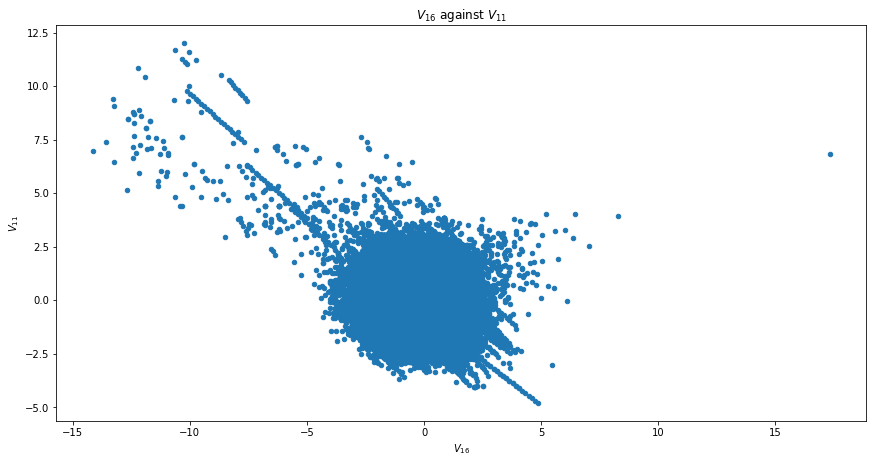

In [14]:
# Plot $V_{16}$ against $V_{11}$.
fig, ax = plt.subplots()
plt.subplots_adjust(right=2, top=1.5)

ax.scatter(np.array(credit["V16"].values), np.array(credit["V11"].values), s=20)
ax.set(title="$V_{16}$ against $V_{11}$",
       xlabel="$V_{16}$", ylabel="$V_{11}$")

plt.show()

I plot $V_{16}$ on the x-axis and $V_{11}$ on the y-axis. From the plot, we can see that the data pairs $\left(V_{16}, V_{11}\right)$ are centrosymmetic to point $(0,0)$, with a circle shape of the joint distribution. Besides, the plot suggests a negative linear relationship between variables $V_{16}$ and $V_{11}$ (that "straight line" passes through the circle). However, this does not reflect on correlation as shown below. The "contradictory" phenomenon may have a possible and reasonable explanation that, the amount of data which formed the "trend line" are negligible, compared to the amount of data which form the "circle".

## 2.5. What other thoughts do you have about the data, that if you had time you would investigate?

Multicollinearity. 

Judging whether there is a multicollinearity relationship among the selected variables is so vital to our next step and the model, although we rejected the existence of extreme dependency (or collinearity). The existence of multicollinearity means that the design matrix $X$ is singular or approximates to singular, then we may not get a unique solution for our model parameters, or just get a solution which is emtreme and ridiculous. If we detect any possible multicollinearity relationship, in next step we can discuss how to eliminate it, such as simply remove those variables or apply modified model like ridge regression.

# 3. Classifying credit fraud

## 3.1. Split your data into train/test (Hint: from sklearn.model_selection import train_test_split).

In [15]:
split_result = train_test_split(credit)
train, test = split_result[0], split_result[1]

## 3.2. What is the balance within the Class variable? (i.e. how many positives and negatives are there, is this relationship balanced?)

In [16]:
# Slightly modify the code that I written for the first question.
print(f"The number of positives is: " + str(credit[credit["Class"] == 0].shape[0]))
print(f"The number of negatives is: " + str(credit[credit["Class"] == 1].shape[0]))

The number of positives is: 284315
The number of negatives is: 492


In [17]:
# Compute the proportion of negatives.
credit[credit["Class"] == 1].shape[0] / credit.shape[0]

0.001727485630620034

Negatives only take about $0.17275\% < 1\%$ in the total data size. The dataset is not only imbalanced, by our definition, it is defined as an "extremely imbalanced dataset". 

## 3.3. Perform a sampling method, based on your analysis above I.4, on only the training set.

In [18]:
train, test = split_result[0], split_result[1]
def OverUnderSampling(data: pd.DataFrame) -> list:
    # Equal sizes for data of two classes
    n, negative = data[data["Class"] == 1].shape[0], data[data["Class"] == 0]
    
    negRows = negative.shape[0]
    print(negRows, n)
    weight = {0: negRows + n / n, 1: 1}
    negRows = random.sample(list(range(negRows)), n)
    negative, positive = negative.iloc[negRows, :], data[data["Class"] == 1]
    
    return [positive, negative, weight]

samp_result = OverUnderSampling(train)
positive, negative, weight = samp_result[0], samp_result[1], samp_result[2]

213236 369


In [19]:
weight[0] / weight[1]

213237.0

In [20]:
train = pd.concat([positive, negative])
train.shape[0]

738

In [21]:
positive.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
62059.0,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,-4.153692,...,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1
102489.0,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,-8.993811,...,1.089084,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,104.00,1
13126.0,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1
151916.0,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,-1.675884,-3.991785,...,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,0.01,1
140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,-5.112971,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1


In [22]:
negative.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
78763.0,1.170640,0.181441,0.276360,0.536637,-0.217898,-0.301388,-0.165375,0.141366,-0.072995,-0.127115,...,-0.220749,-0.688621,0.158992,-0.050784,0.078511,0.110379,-0.017124,0.014881,1.29,0
162725.0,1.940095,-0.409976,-0.338015,0.304451,-0.457060,0.122076,-0.705851,0.132950,1.079899,-0.026400,...,0.250942,0.942871,0.137825,0.808974,-0.087392,-0.271590,0.037960,-0.037388,9.99,0
36240.0,-1.766767,-0.753413,1.081589,-1.873844,0.117384,-1.220454,-0.360838,0.454229,-1.932967,-0.185796,...,-0.309582,-1.173964,-0.076621,0.029160,0.111891,1.175587,-0.202748,-0.207574,42.22,0
40303.0,1.116077,-0.077900,0.447195,1.356930,-0.507311,-0.067192,-0.280287,0.322206,0.560606,0.151976,...,-0.081354,-0.195570,-0.001626,0.133818,0.486468,-0.329659,0.014114,-0.000920,2.49,0
49663.0,-0.796122,1.140775,1.393456,0.300847,0.059248,-0.009587,0.350625,0.190591,-0.488938,0.517138,...,-0.135770,-0.245951,0.041066,0.007780,-0.618507,0.189193,0.354726,0.254812,7.41,0


In [23]:
print(positive.shape[0] == negative.shape[0])
print(set(positive["Class"]), set(negative["Class"]))

True
{1} {0}


In [24]:
X_train, y_train = train.iloc[:, :29], train.iloc[:, 29:]["Class"]

X_test, y_test = test.iloc[:, :29], test.iloc[:, 29:]["Class"]

In [25]:
X_test.shape

(71202, 29)

## 3.4. Train a Logistic Lasso Regression model (Hint: from sklearn.linear_model import LogisticRegression).

In [26]:
clf = LogisticRegression(penalty="l1", solver="liblinear", class_weight=weight).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(sum(y_pred), sum(y_test))

123 123


## 3.5. What is the goal of running Logistic Lasso Regression?

First of all, we are using logistic regression to predict binary classes, that is discrete classification problem, and the sigmoid function in logistic regression just transform continuous value $\theta^{T}X$ to binary responses. Lasso regression is widely used to prevent the occurence of over-fitting, by introducing $\lambda$ into the model and by regularization, the constraint function will give punishment if more parameters were added into the model, which in the form of:

$$
w = (\lambda I + \Phi^{T}\Phi)^{-1}\Phi^{T}t
$$

Hence, by running a logistic lasso regression, we can derive a reasonable model to predict binary variables with better performance and relatively simpler model.

# 4. Evaluation of results

## 4.1. Show the confusion matrix

In [27]:
confusion_matrix(y_test, y_pred)

array([[71040,    39],
       [   39,    84]], dtype=int64)

## 4.2. Report performance metrics Accuracy, Precision, Recall

In [28]:
accuracy_score(y_test, y_pred)

0.9989045251537878

In [29]:
precision_score(y_test, y_pred)

0.6829268292682927

In [30]:
recall_score(y_test, y_pred)

0.6829268292682927

We can see that, the model have super high rate of accuracy, the precision score and recall score are also very high, which shows the excellent performance of the model.

## 4.3. What metric would you maximize in search of the best performing model?

In practice, I would rather choose to maximise the $F_{1}$ metric (or score), which combines precision and recall togther and makes trade-offs between them.
$$
F_{1} = \frac{2\cdot P \cdot R}{P + R},
$$
where $P$ and $R$ denote precision and recall scores respectively. 

By using $F_{1}$ metric, the model would produce very low scores if extreme values were used. The reason why I would choose $F_{1}$ is because none of accuracy, precision or recall score is perfect in every circumstances. For example, accuracy may lose most of its value when facing imbalanced problem as above. We sometimes can easily get a high accuracy rate, since there is a huge discrepancy between the classes (such as default credit and honest credit, bad people and good people, the latter is always much more than the former), however, it is kind of an useless "high", because it cannot acutually solve the practical problems for us.